In [1]:
import pyute as ut
import autograd.numpy as np
import matplotlib.pyplot as plt
import sklearn
import h5py
import pdb
import scipy.optimize as sop
from autograd import elementwise_grad as egrad
from mpl_toolkits.mplot3d import Axes3D
import sklearn.discriminant_analysis as skd
import autograd.scipy.special as ssp
from autograd import jacobian
import size_contrast_analysis as sca
%matplotlib notebook

/Users/dan/Documents/code/downloads/OASIS/oasis/functions.py:14: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  "just not the slower interior point methods we compared to in the papers.")


In [2]:
def f_miller_troyer(mu,s2):
    u = mu/np.sqrt(2*s2)
    A = 0.5*mu*(1+ssp.erf(u))
    B = np.sqrt(s2)/np.sqrt(2*np.pi)*np.exp(-u**2)
    return A + B

In [55]:
def ydot(y,v):
    return f_miller_troyer(y @ W + v,1) - y

In [56]:
np.dot(W,y).shape

ValueError: shapes (2,2) and (100,100,2) not aligned: 2 (dim 1) != 100 (dim 1)

In [58]:
wee = 1
wei = -1
wie = 1
wii = 0
nx = 100
nh = 100
v = np.zeros((nx,nh,2))
xx = np.linspace(-2,2,nx)
hh = np.linspace(-2,2,nh)
for ih,h in enumerate(hh):
    for ix,x in enumerate(xx):
        v[ix,ih] = np.array((x,h))
W = np.array(((wee,wei),(wie,wii)))

dt = 1e-2
niter = int(1e4)
y0 = np.zeros((nx,nh,2))
y = y0.copy()
for iiter in range(niter):
    y = y + dt*ydot(y,v)

In [60]:
y.shape

(100, 100, 2)

<IPython.core.display.Javascript object>


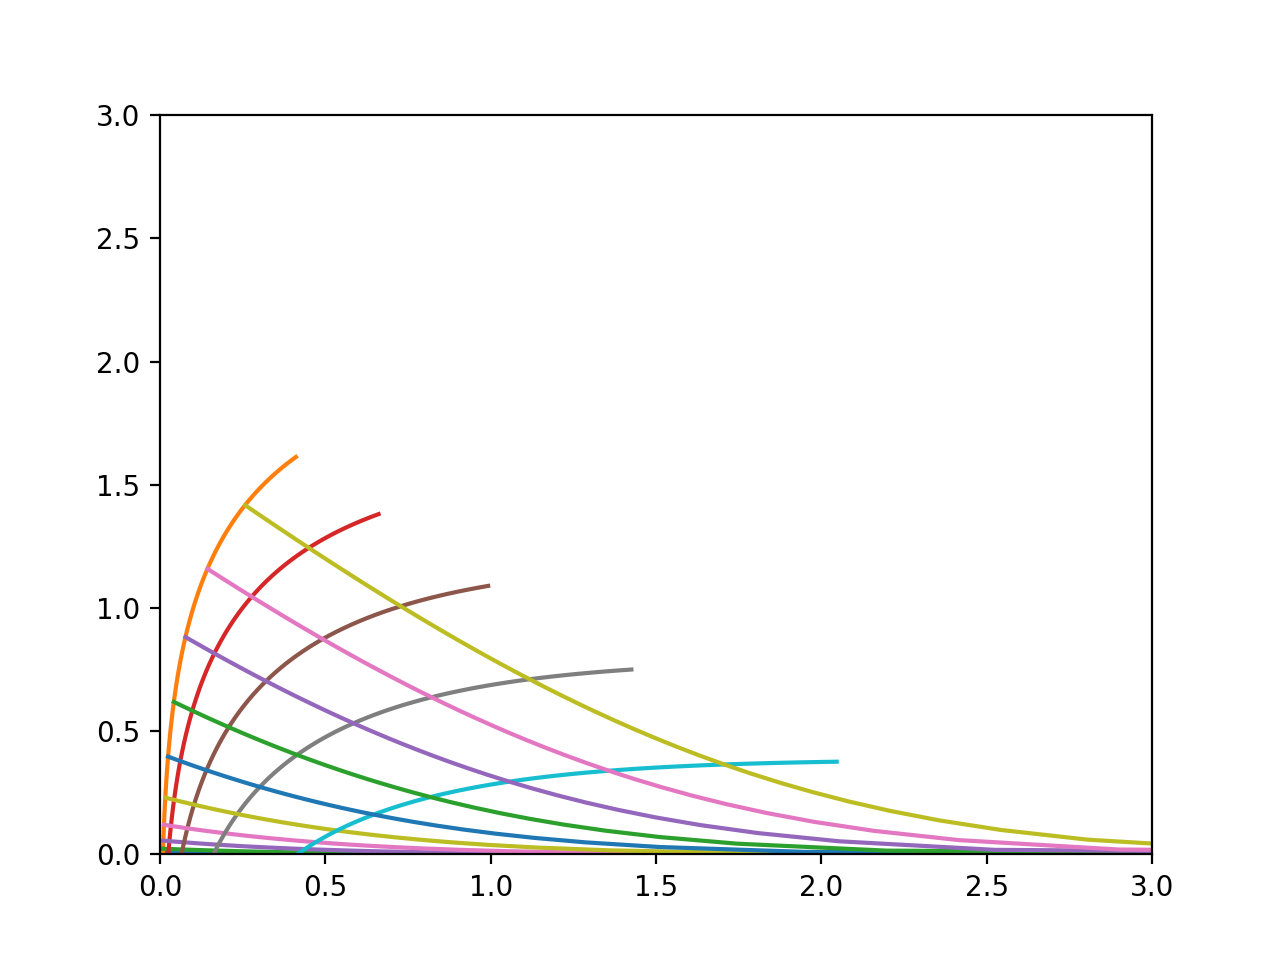

(0, 3)

In [67]:
plt.figure()
# plt.plot(y.T)
for ih in range(0,100,10): #ih = 0
    plt.plot(y[:,ih,0],y[:,ih,1])
    plt.plot(y[ih,:,0],y[ih,:,1])
plt.ylim((0,3))
plt.xlim((0,3))